### Зачем векторизовать (превращать в последовательность чисел) текст?

<font size="1"> Потому что мы умеем складывать, умножать и сравнивать, а текст нет! </font>

__Какие подходы сейчас посмотрим?__
 - <font size="3"> Bag of words </font>
 - <font size="3"> Tf-idf </font>
 - <font size="3"> Word2vec </font>

### Bag of words (Мешок слов)

Слов потому что слова. Мешок потому что порядок неучитываем.

![bagofwords](https://dudeperf3ct.github.io/images/lstm_and_gru/bag-of-words.png )

In [1]:
text = '''
Шаганэ ты моя, Шаганэ!
Потому, что я с севера, что ли,
Я готов рассказать тебе поле,
Про волнистую рожь при луне.
Шаганэ ты моя, Шаганэ.
'''

In [2]:
from string import punctuation

for char in punctuation:
    text = text.replace(char, '')

text = text.lower()

corpus = text.split('\n')
corpus = corpus[1:-1]

In [3]:
corpus

['шаганэ ты моя шаганэ',
 'потому что я с севера что ли',
 'я готов рассказать тебе поле',
 'про волнистую рожь при луне',
 'шаганэ ты моя шаганэ']

In [4]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

bagofwords = CountVectorizer()

vectorized_corpus = bagofwords.fit_transform(corpus).todense()
vectorized_corpus = np.array(vectorized_corpus)

In [5]:
for text, vec in zip(corpus, vectorized_corpus):
    print(vec, text) 

[0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 2] шаганэ ты моя шаганэ
[0 0 1 0 0 0 1 0 0 0 0 1 0 0 2 0] потому что я с севера что ли
[0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0] я готов рассказать тебе поле
[1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0] про волнистую рожь при луне
[0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 2] шаганэ ты моя шаганэ


### TF-IDF (term frequency - inversed document frequency)

- Частотность слова в документе

$$
tf(t, d) = \frac{n_k}{\sum_k n_k}
$$

индекс пробегает по словам, $n_k$ - кол-во слова в документе

- Обратная частота документа

$$
idf(t, D) = \log \frac{|D|}{|\{d_i \in D | t \in d_i\}|}
$$

$D$ - вся коллекция документов

Член idf может меняться от реализации подсчета данной меры

In [6]:
corpus

['шаганэ ты моя шаганэ',
 'потому что я с севера что ли',
 'я готов рассказать тебе поле',
 'про волнистую рожь при луне',
 'шаганэ ты моя шаганэ']

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(smooth_idf=False)
vectorized_corpus = tfidf.fit_transform(corpus).todense()
vectorized_corpus = np.array(vectorized_corpus)

In [8]:
for text, vec in zip(corpus, vectorized_corpus):
    print(list(np.round(vec, 3)), text)

[0.0, 0.0, 0.0, 0.0, 0.408, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.408, 0.0, 0.816] шаганэ ты моя шаганэ
[0.0, 0.0, 0.378, 0.0, 0.0, 0.0, 0.378, 0.0, 0.0, 0.0, 0.0, 0.378, 0.0, 0.0, 0.756, 0.0] потому что я с севера что ли
[0.0, 0.5, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0] я готов рассказать тебе поле
[0.447, 0.0, 0.0, 0.447, 0.0, 0.0, 0.0, 0.447, 0.447, 0.0, 0.447, 0.0, 0.0, 0.0, 0.0, 0.0] про волнистую рожь при луне
[0.0, 0.0, 0.0, 0.0, 0.408, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.408, 0.0, 0.816] шаганэ ты моя шаганэ


**Давайте посчитаем сами для предложения "ты шаганэ"**

$$tf(\text{шаганэ}, -1) = \frac{1}{2}$$

$$idf(\text{шаганэ}, D) = \log \left( \frac{5}{2} \right) + 1$$

$$tf(\text{ты}, -1) = \frac{1}{2}$$

$$idf(\text{ты}, D) = \log \left( \frac{5}{2} \right) + 1$$

In [9]:
tf = 1/2
idf = np.log(2.5) + 1

def magic(name): return 0. if name not in {'шаганэ', 'ты'} else tf*idf

vec = np.array([ magic(name) for name in tfidf.get_feature_names()])
vec

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.95814537, 0.        ,
       0.95814537])

In [10]:
tfidf.transform(['шаганэ ты']).todense()

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.70710678, 0.        ,
         0.70710678]])

In [11]:
vec / np.sqrt(np.sum(vec**2))

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.70710678, 0.        ,
       0.70710678])

### Word2Vec

<font size="3"> Основная идея </font>

**Похожие слова встречаются рядом с похожи словами. Давайте по "контексту" слова предсказывать его или наоборот.**

<font size="3"> Подробнее </font>

При обучение модели типа CBOW нейронная сеть учится предсказывать по контексту - слово. Причем используется как контекст перед словом, так и после слова, порядок слов при этом не учитывается. Интуитивное обоснование такой модели заключается в том, что близкие по смыслу слова, встречаются в одинаковом контексте.

При обучении модели типа Skipgram нейронная сеть учится предсказывать по слову - его контекст. Интуитивное обоснование в данном случае похоже, близкие по смыслу слова встречаются в одинаковом контексте, а следовательно должны порождать одинаковые распределения вероятностей, которые описывают вероятность появления слова в
контексте данного слова.

![word2vec](http://nlpx.net/wp/wp-content/uploads/2015/11/word2vec.png)

**Сгенерируем последовательности "текста", сгруппируем по остатку от количества групп**

In [12]:
length = np.arange(15, 35) # длина записи от 25 до 30

NCOUNT = 100
nsize = 500 # количество записей

ngroups = 3
colours = ['r', 'g', 'b']

data = []

for _ in np.arange(nsize):
    nlength = np.random.choice(length) # выбираем длину

    for i in np.arange(ngroups):
        datum = np.random.choice(np.arange(i, NCOUNT, ngroups), nlength)
        data.append(datum)


**Для начала выделим слова и контексты**

In [13]:
patch_size = 5
hpatch_size = patch_size // 2

patches = list()

for datum in data:
    for idx in np.arange(hpatch_size, datum.size - hpatch_size):
        patch = datum[idx-hpatch_size: idx+hpatch_size+1]
        assert patch.size == patch_size
        
        patches.append(patch)

In [14]:
words = list()
contextes = list()

for patch in patches:
    word = patch[hpatch_size]
    context = np.concatenate([patch[:hpatch_size], patch[hpatch_size+1:]])

    words.append(word)
    contextes.append(context)

words = np.array(words)
contextes = np.array(contextes)

**Опишем нашу нейросеть**

In [15]:
import torch, torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [16]:
def torch_float_cuda(data):
    return Variable(torch.FloatTensor(data)).cuda()

def torch_long_cuda(data):
    return Variable(torch.LongTensor(data)).cuda()

def compute_loss(model, X_batch, y_words_batch):
    X_batch = torch_long_cuda(X_batch)
    y_words_batch = torch_long_cuda(y_words_batch)

    _, pred_word_logits_batch = model.cuda()(X_batch)

    loss_correct = F.cross_entropy(pred_word_logits_batch, y_words_batch.reshape(-1)).mean()

    loss_incorrect = torch.zeros_like(loss_correct)

#     for _ in np.arange(3):
#         non_y_words_batch = torch.randint(0, NCOUNT, y_words_batch.shape).cuda()
#         to_onehot = torch.arange(NCOUNT).reshape(1, NCOUNT).cuda()

#         non_y_words_batch_onehot = (non_y_words_batch == to_onehot).float()

#         log_softmax_logits = F.log_softmax(pred_word_logits_batch, dim=1)

#         loss = - log_softmax_logits * non_y_words_batch_onehot
#         loss = loss.sum() / X_batch.shape[0]

#         loss_incorrect += loss

    return loss_correct + loss_incorrect

![word2vec](http://nlpx.net/wp/wp-content/uploads/2015/11/word2vec.png)

In [17]:
class Sum(nn.Module):
    def forward(self, x):
        return x.sum(dim=1)

class word2vec(nn.Module):
    def __init__(self, embedding_dim=2):
        super(word2vec, self).__init__()
        
        self.embedding = nn.Embedding( num_embeddings=NCOUNT,
                                       embedding_dim=embedding_dim )

        self.projection = nn.Sequential( nn.Linear( in_features=embedding_dim,
                                                    out_features=embedding_dim*2 ),
                                         nn.ReLU()
                                        )
        
        self.sum = nn.Sequential( Sum(),
                                  nn.ReLU()
                                )

        self.word_logits = nn.Linear( in_features=embedding_dim*2,
                                      out_features=NCOUNT
                                    )
        
    def forward(self, x):
        embedding = self.embedding(x)

        projection = self.projection(embedding)
        sum_ = self.sum(projection)
        word_logits = self.word_logits(sum_)

        return embedding, word_logits

    
    def embegging(self, x):
        return self.embedding(x)

__*Иногда стоит писать даже "простые" тесты*__

In [18]:
test_module = word2vec()
test_module.cuda()

test_embedding, test_word_logits = test_module(torch_long_cuda(np.array(contextes[:1])))

assert test_embedding.shape == (1, patch_size-1, 2)
assert test_word_logits.shape == (1, 100)

**Теперь все это обучим**

In [19]:
import time
import matplotlib.pyplot as plt

from IPython.display import clear_output

%matplotlib inline

In [22]:
model = word2vec().cuda()
opt = torch.optim.Adam(model.parameters(), lr=0.001)

bs = 32

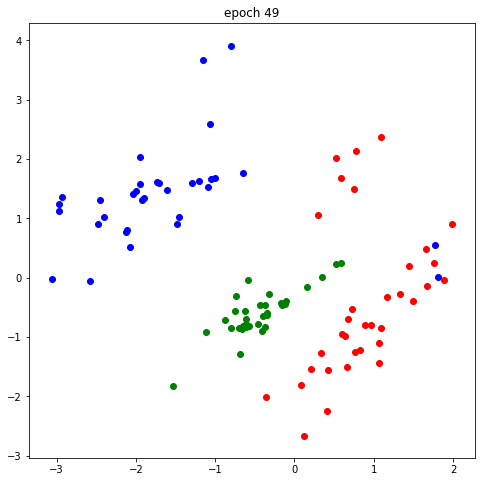

3.5075386


In [23]:
ids = np.arange(words.size)

blosses = [0]

for epoch in np.arange(50):
    
    model.train(False)

    word_coords = model.embedding(torch_long_cuda(np.arange(NCOUNT)))
    word_coords = word_coords.cpu().detach().numpy()

    clear_output(wait=True)
    plt.figure(figsize=(8, 8))
    
    for idx, coord in enumerate(word_coords):
        plt.scatter(*coord, c=colours[idx % ngroups])

    plt.title(f'epoch {epoch}')
    plt.show()
    print(np.mean(blosses))
    
    model.train(True)
    
    blosses = list()
    for idx in np.arange(words.size // bs):
        np.random.shuffle(ids)

        words_batch = words[ids[idx*bs: (idx+1)*bs]].reshape(bs, 1)
        contextes_batch = contextes[ids[idx*bs: (idx+1)*bs]]

        loss = compute_loss(model, contextes_batch, words_batch)
        loss.backward()
        blosses.append(loss.cpu().data.numpy())
        
        opt.step()
        opt.zero_grad()


**Заезжанные примеры**

![word2vec](https://miro.medium.com/max/3902/1*hELlVp9hmZbDZVFstS61pg.png)

In [28]:
!wget http://vectors.nlpl.eu/repository/20/180.zip -O 180.zip

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/rost/.wget-hsts'. HSTS will be disabled.
--2020-07-16 16:04:20--  http://vectors.nlpl.eu/repository/20/180.zip
Resolving vectors.nlpl.eu (vectors.nlpl.eu)... 129.240.189.225
Connecting to vectors.nlpl.eu (vectors.nlpl.eu)|129.240.189.225|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 484452317 (462M) [application/zip]
Saving to: ‘180.zip’

180.zip             100%[===================>] 462,01M  1,44MB/s    in 5m 9s   

2020-07-16 16:09:29 (1,50 MB/s) - ‘180.zip’ saved [484452317/484452317]



In [33]:
import gensim

model = gensim.models.KeyedVectors.load_word2vec_format("180/model.bin", binary=True)

In [37]:
model.vocab

{'так_ADV': <gensim.models.keyedvectors.Vocab at 0x7fd75c037588>,
 'быть_VERB': <gensim.models.keyedvectors.Vocab at 0x7fd75c037668>,
 'мочь_VERB': <gensim.models.keyedvectors.Vocab at 0x7fd75c037438>,
 'год_NOUN': <gensim.models.keyedvectors.Vocab at 0x7fd75c0376d8>,
 'человек_NOUN': <gensim.models.keyedvectors.Vocab at 0x7fd75c037710>,
 'xxxxxx_NUM': <gensim.models.keyedvectors.Vocab at 0x7fd75c037748>,
 'сказать_VERB': <gensim.models.keyedvectors.Vocab at 0x7fd75c037780>,
 'еще_ADV': <gensim.models.keyedvectors.Vocab at 0x7fd75c0377b8>,
 'один_NUM': <gensim.models.keyedvectors.Vocab at 0x7fd75c0377f0>,
 'говорить_VERB': <gensim.models.keyedvectors.Vocab at 0x7fd75c037828>,
 'уже_ADV': <gensim.models.keyedvectors.Vocab at 0x7fd75c037860>,
 'другой_ADJ': <gensim.models.keyedvectors.Vocab at 0x7fd75c037898>,
 'время_NOUN': <gensim.models.keyedvectors.Vocab at 0x7fd75c0378d0>,
 'xxxxxxxx_NUM': <gensim.models.keyedvectors.Vocab at 0x7fd75c037908>,
 'знать_VERB': <gensim.models.keyedvecto

In [48]:
model.most_similar(positive=['парень_NOUN', 'королева_NOUN'], negative=['девушка_NOUN'], topn=1)

[('король_NOUN', 0.545663595199585)]